In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [23]:
qcdfiles = [
"/eos/uscms/store/user/ekoenig/4BAnalysis/NTuples/feynnet/QCD_HT1000to1500_BGenFilter_TuneCP5_13TeV-madgraph-pythia8/reweight_ntuple.root",
"/eos/uscms/store/user/ekoenig/4BAnalysis/NTuples/feynnet/QCD_HT100to200_BGenFilter_TuneCP5_13TeV-madgraph-pythia8/reweight_ntuple.root",
"/eos/uscms/store/user/ekoenig/4BAnalysis/NTuples/feynnet/QCD_HT1500to2000_BGenFilter_TuneCP5_13TeV-madgraph-pythia8/reweight_ntuple.root",
"/eos/uscms/store/user/ekoenig/4BAnalysis/NTuples/feynnet/QCD_HT2000toInf_BGenFilter_TuneCP5_13TeV-madgraph-pythia8/reweight_ntuple.root",
"/eos/uscms/store/user/ekoenig/4BAnalysis/NTuples/feynnet/QCD_HT200to300_BGenFilter_TuneCP5_13TeV-madgraph-pythia8/reweight_ntuple.root",
"/eos/uscms/store/user/ekoenig/4BAnalysis/NTuples/feynnet/QCD_HT300to500_BGenFilter_TuneCP5_13TeV-madgraph-pythia8/reweight_ntuple.root",
"/eos/uscms/store/user/ekoenig/4BAnalysis/NTuples/feynnet/QCD_HT500to700_BGenFilter_TuneCP5_13TeV-madgraph-pythia8/reweight_ntuple.root",
"/eos/uscms/store/user/ekoenig/4BAnalysis/NTuples/feynnet/QCD_HT700to1000_BGenFilter_TuneCP5_13TeV-madgraph-pythia8/reweight_ntuple.root",
"/eos/uscms/store/user/ekoenig/4BAnalysis/NTuples/feynnet/QCD_bEnriched_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8/reweight_ntuple.root",
"/eos/uscms/store/user/ekoenig/4BAnalysis/NTuples/feynnet/QCD_bEnriched_HT100to200_TuneCP5_13TeV-madgraph-pythia8/reweight_ntuple.root",
"/eos/uscms/store/user/ekoenig/4BAnalysis/NTuples/feynnet/QCD_bEnriched_HT1500to2000_TuneCP5_13TeV-madgraph-pythia8/reweight_ntuple.root",
"/eos/uscms/store/user/ekoenig/4BAnalysis/NTuples/feynnet/QCD_bEnriched_HT2000toInf_TuneCP5_13TeV-madgraph-pythia8/reweight_ntuple.root",
"/eos/uscms/store/user/ekoenig/4BAnalysis/NTuples/feynnet/QCD_bEnriched_HT200to300_TuneCP5_13TeV-madgraph-pythia8/reweight_ntuple.root",
"/eos/uscms/store/user/ekoenig/4BAnalysis/NTuples/feynnet/QCD_bEnriched_HT300to500_TuneCP5_13TeV-madgraph-pythia8/reweight_ntuple.root",
"/eos/uscms/store/user/ekoenig/4BAnalysis/NTuples/feynnet/QCD_bEnriched_HT500to700_TuneCP5_13TeV-madgraph-pythia8/reweight_ntuple.root",
"/eos/uscms/store/user/ekoenig/4BAnalysis/NTuples/feynnet/QCD_bEnriched_HT700to1000_TuneCP5_13TeV-madgraph-pythia8/reweight_ntuple.root",
]

ttbarfiles = [
    "/eos/uscms/store/user/ekoenig/4BAnalysis/NTuples/feynnet/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8/reweight_ntuple.root",
]

In [24]:
tree = ObjIter([Tree(qcdfiles), Tree(ttbarfiles)])

100%|██████████| 1/1 [00:00<00:00,  8.78it/s]


In [27]:
tree.apply(lambda t : t.extend(scale=ak.ones_like(t.scale)))

[None, None]

In [31]:
tree.fields

[['abs_scale', 'dataset_norm_abs_scale', 'is_bkg', 'jet_E', 'jet_btag', 'jet_chEmEF', 'jet_chHEF', 'jet_eta', 'jet_hadronFlav', 'jet_id', 'jet_m', 'jet_mRegressed', 'jet_nConstituents', 'jet_neEmEF', 'jet_neHEF', 'jet_partonFlav', 'jet_phi', 'jet_pt', 'jet_ptRegressed', 'jet_puid', 'jet_qgl', 'jet_signalId', 'njet_E', 'njet_btag', 'njet_chEmEF', 'njet_chHEF', 'njet_eta', 'njet_hadronFlav', 'njet_id', 'njet_m', 'njet_mRegressed', 'njet_nConstituents', 'njet_neEmEF', 'njet_neHEF', 'njet_partonFlav', 'njet_phi', 'njet_pt', 'njet_ptRegressed', 'njet_puid', 'njet_qgl', 'njet_signalId', 'norm_abs_scale', 'scale', 'sample_id'], ['abs_scale', 'dataset_norm_abs_scale', 'is_bkg', 'jet_E', 'jet_btag', 'jet_chEmEF', 'jet_chHEF', 'jet_eta', 'jet_hadronFlav', 'jet_id', 'jet_m', 'jet_mRegressed', 'jet_nConstituents', 'jet_neEmEF', 'jet_neHEF', 'jet_partonFlav', 'jet_phi', 'jet_pt', 'jet_ptRegressed', 'jet_puid', 'jet_qgl', 'jet_signalId', 'njet_E', 'njet_btag', 'njet_chEmEF', 'njet_chHEF', 'njet_eta'

100%|██████████| 1/1 [00:01<00:00,  1.03s/it]


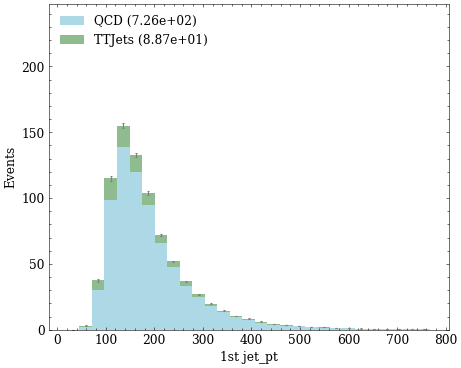

In [33]:
study.quick(
    tree,
    scale=lambda t:t.dataset_norm_abs_scale,
    varlist=['jet_pt[:,0]'],
    legend=True, lumi=None,
)